## A helper function that converts images to RGB 

In [ ]:
import os
import imghdr
from PIL import Image

def convert_images_rgb(path):
    """
    Converts images to RGB in the given directory.
    
    Args:
        path: String value to the image directory(folder)
        
    Returns:
        None
    """
    images = os.listdir(path)
    for image in images:
        img_dir = path + "\\"+ image
        im = Image.open(img_dir)
        rgb_im = im.convert("RGB")
        rgb_im.save(img_dir)
        print(f"File Name: {image} Type: {imghdr.what(img_dir)}")

In [69]:
PATH = "D:\Projects\Python\Projects\Price Finder\classification_model\images"

# loops through the sub-directories and call the convert_images_rgb() function
for dir_name in os.listdir(PATH):
    dir_path = PATH + "\\" + dir_name
    for folder_name in os.listdir(dir_path):
        print(f"\nScanning folder: {dir_name}\{folder_name}\n")
        image_folder_path = dir_path + "\\" + folder_name
        convert_images_rgb(image_folder_path)


Scanning folder: test\Alto 2015


Scanning folder: test\Hero Dash 2016


Scanning folder: test\Toyota Aqua 2014


Scanning folder: train\Alto 2015


Scanning folder: train\Hero Dash 2016


Scanning folder: train\Toyota Aqua 2014



In [11]:
# Creating training set and test directory paths

train_dir = "images/train"
test_dir = "images/test"

In [12]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)

Found 2275 files belonging to 3 classes.
Found 570 files belonging to 3 classes.


In [13]:
# Checking out the class names
train_data.class_names

['Alto 2015', 'Hero Dash 2016', 'Toyota Aqua 2014']

In [15]:
# Helper function to create tensorboard callbacks
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [17]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model (the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Avergae pool the outputs of the base model (aggregate all the most important information, reduce the number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(3, activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 10. Fit the model and save its history
history_1 = model_0.fit(train_data,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = int( 0.25 * len(test_data)))

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Epoch 1/5
72/72 [==============================] - 38s 380ms/step - loss: 0.3794 - accuracy: 0.8840 - val_loss: 0.2064 - val_accuracy: 0.9453
Epoch 2/5
72/72 [==============================] - 26s 351ms/step - loss: 0.1690 - accuracy: 0.9473 - val_loss: 0.1158 - val_accuracy: 0.9688
Epoch 3/5
72/72 [==============================] - 26s 352ms/step - loss: 0.1306 - accuracy: 0.9604 - val_loss: 0.1097 - val_accuracy: 0.9922
Epoch 4/5
72/72 [==============================] - 26s 352ms/step - loss: 0.1130 - accuracy: 0.9679 - val_loss: 0.1159 - val_accuracy: 0.9688
Epoch 5/5
72/72 [==============================] - 26s 351ms/step - loss: 0.0908 - accuracy: 0.9767 - val_loss: 0.1145 - val_accuracy: 0.9688


In [17]:
# import os
# from PIL import Image
# import cv2
# import matplotlib.image as mpimg

# def convert_images_rgb(path):
#     """
#     Converts images that contains more than 3 color channels to RGB in the given directory.
    
#     Args:
#         path: String value to the image directory(folder)
        
#     Returns:
#         None
#     """
#     images = os.listdir(path)
#     for image in images:
#         img_dir = path + "\\"+ image
#         img = mpimg.imread(img_dir)
#         if(img.shape[2] > 3):
#             print(f"File: {img_dir} | Shape: {img.shape}")
#             rgba_image = cv2.imread(img_dir)
#             cv2.imwrite(img_dir, rgba_image)
#             print(f"File: {image} converted to 3 color channels | shape: {rgba_image.shape}")

In [20]:
# PATH = "D:\Projects\Python\Projects\Price Finder\classification_model\images"

# import os
# import cv2
# import matplotlib.image as mpimg

# # loops through the sub-directories and call the convert_images_rgb() function
# for dir_name in os.listdir(PATH):
#     dir_path = PATH + "\\" + dir_name
#     for folder_name in os.listdir(dir_path):
#         print(f"\nScanning folder: {dir_name}\{folder_name}\n")
#         image_folder_path = dir_path + "\\" + folder_name
        
#         images = os.listdir(image_folder_path)
        
#         for image in images:
#             img_dir = image_folder_path + "\\"+ image
#             img = mpimg.imread(img_dir)
#             if(img.shape[2] > 3):
#                 print(f"File: {img_dir} | Shape: {img.shape}")
# #                 rgba_image = cv2.imread(img_dir)
# #                 cv2.imwrite(img_dir, rgba_image)
# #                 print(f"File: {image} converted to 3 color channels | shape: {rgba_image.shape}")
        


In [21]:
# import imghdr
# import os
# from PIL import Image

# PATH = "images\\"

# for dir_name in os.listdir(PATH):
#     dir_path = PATH + "\\" + dir_name
#     for folder_name in os.listdir(dir_path):
#         print(f"\nScanning folder: {dir_name}\{folder_name}\n")
#         image_folder_path = dir_path + "\\" + folder_name
#         images = os.listdir(image_folder_path)
#         for image in images:
#             img_dir = image_folder_path + "\\"+ image
#             im = Image.open(img_dir)
#             rgb_im = im.convert("RGB")
#             #print(f"File Name: {image} Type: {imghdr.what(img_dir)}")
#             rgb_im.save(img_dir)
#             #print("After Conversion")
#             print(f"File Name: {image} Type: {imghdr.what(img_dir)}")

In [18]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

18/18 [==============================] - 8s 405ms/step - loss: 0.1022 - accuracy: 0.9702


[0.10215950012207031, 0.9701754450798035]

In [16]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validaion metrics.

  Args:
    history: TensorFlow history object

  Returns:
    Plots of training/validation loss and accuracy metrics
  """
  
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we run for

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

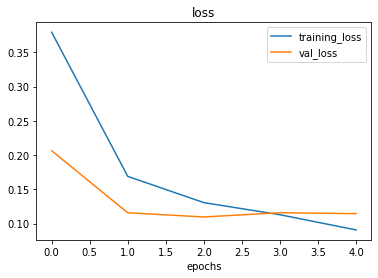

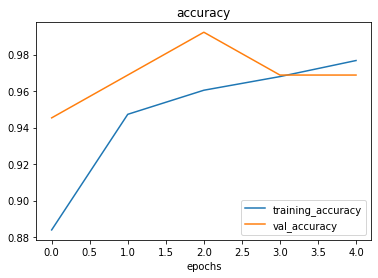

In [19]:
# Checking the model's training curves
plot_loss_curves(history_1)